IMPORT ALL REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
import warnings   
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

LOAD THE COLLEGE DATASET AND INSPECT THE DATA

In [2]:
# Read the csv file using pandas
college_data = pd.read_csv('data.csv')

# Check the first 5 rows in the dataset
college_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [3]:
# Check the important information in the dataset
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [4]:
# Describe the dataset
college_data.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


CHECK FOR NAN VALUES

In [5]:
# Use isnull() function to find the NaN values
college_data.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [6]:
# Use dtypes to find out the different data types
for col in college_data.columns:
    print(f'{col}', college_data[col].dtypes)

type_school object
school_accreditation object
gender object
interest object
residence object
parent_age int64
parent_salary int64
house_area float64
average_grades float64
parent_was_in_college bool
will_go_to_college bool


VISUALIZE THE RELATIONSHIP WITH THE DATA POINTS USING PAIRPLOT

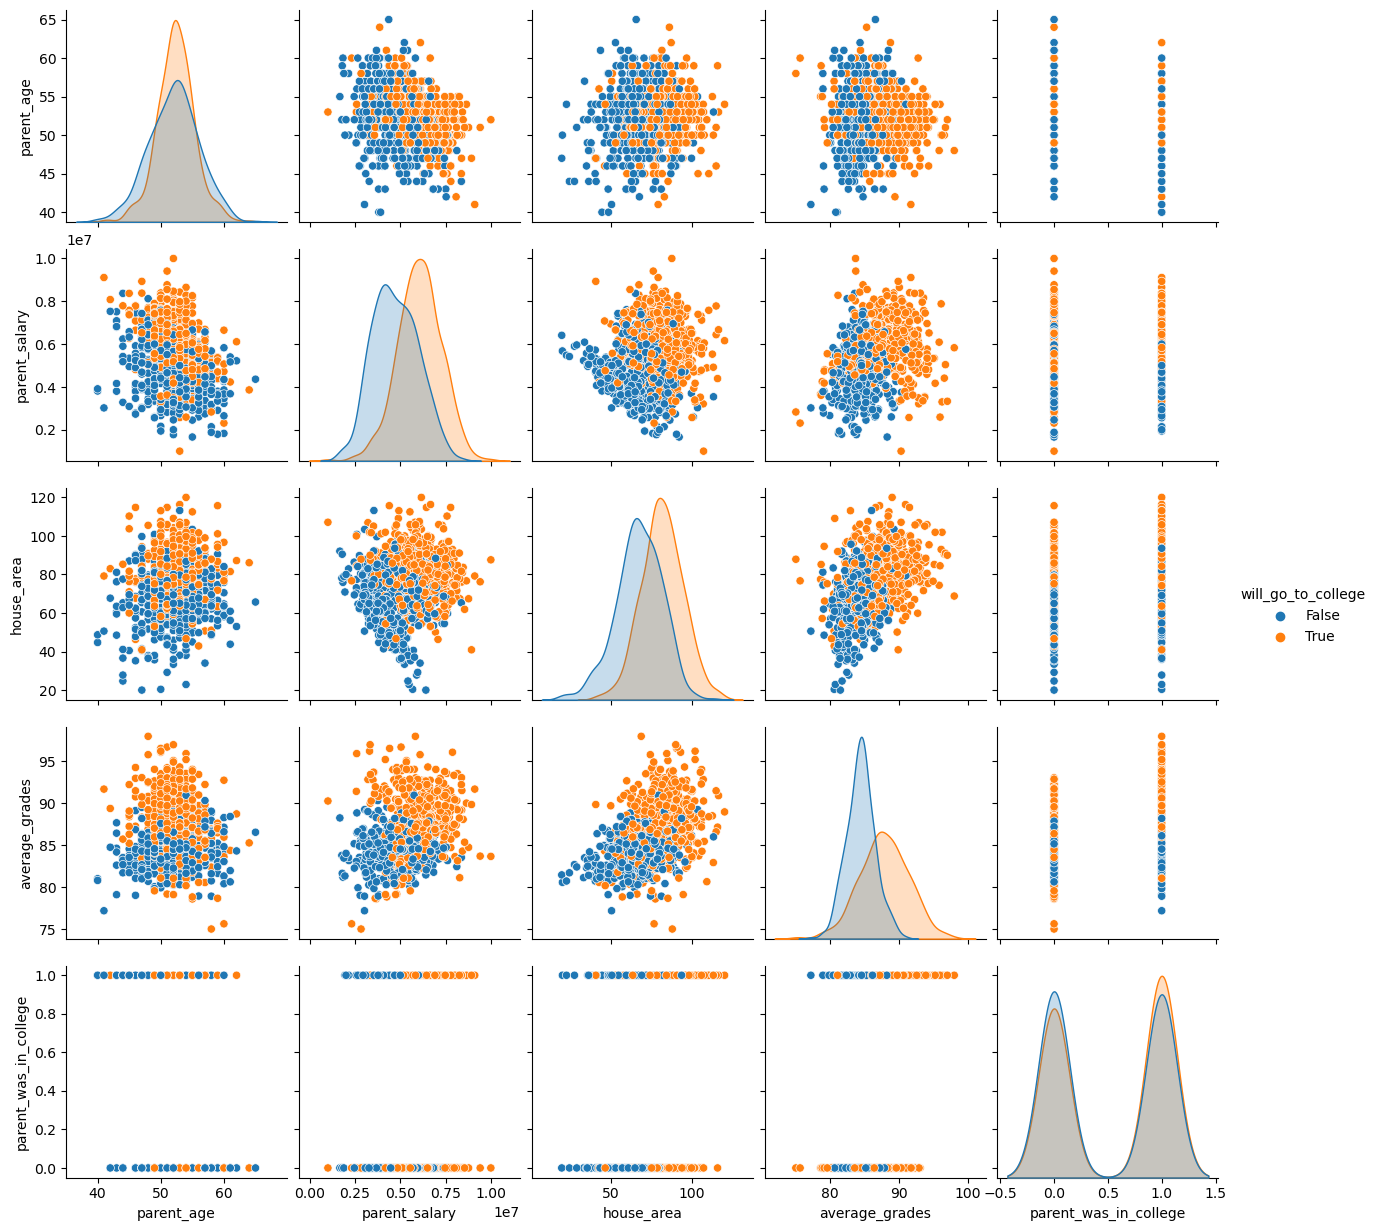

In [7]:
sns.pairplot(college_data, hue='will_go_to_college')
plt.show()

In [8]:
college_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


USING LABEL ENCODER TO CONVERT CATEGORICAL DATA TO NUMERIC DATA

In [9]:
# Call the LabelEncoder class
le = LabelEncoder()
# Iterate through the dataset columns and convert the items with object or bool datatype to numeric values
for col in college_data.columns:
    if college_data[col].dtype == 'object' or  'bool':
        college_data[col] = le.fit_transform(college_data[col])

In [10]:
college_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,16,376,313,200,0,1
1,0,0,1,1,1,17,147,256,405,0,1
2,0,1,0,4,1,10,340,293,438,0,1
3,1,1,1,4,0,9,349,270,81,1,1
4,0,0,0,4,1,17,224,242,395,0,0


SPLIT THE DATA INTO CLASS ATTRIBUTE(X) AND CLASS LABEL(y)

In [11]:
X = college_data.drop('will_go_to_college', axis=1)
y = college_data.will_go_to_college

In [12]:
X.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,0,0,1,1,1,16,376,313,200,0
1,0,0,1,1,1,17,147,256,405,0
2,0,1,0,4,1,10,340,293,438,0
3,1,1,1,4,0,9,349,270,81,1
4,0,0,0,4,1,17,224,242,395,0


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: will_go_to_college, dtype: int64

CHECK IF THE UNIQUE VALUES IN y ARE BALANCED

In [14]:
y.value_counts()

will_go_to_college
1    500
0    500
Name: count, dtype: int64

SPLIT THE DATA INTO FOR TRAINING AND TESTING PURPOSES

In [15]:
# Split X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

USE STANDARDSCALER TO SCALE THE VALUES IN X COLUMNS

In [16]:
# Call the Standardascaler class
scaler = StandardScaler()
# Feed the scaler with data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

RUN THE DECISION TREE CLASSIFIER MODEL

In [17]:
# Initiate the Decision Tree Classifier model
classifier_D = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier with data
classifier_D.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
# Predict the values of y_test from X_test using the Decision Tree classifier 
y_pred_D = classifier_D.predict(X_test)
y_pred_D

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1])

USE METRICS TO GET THE ACCURACY SCORE, PRECISION SCORE, RECALL AND F1 SCORE AFTER USING DECISION TREE CLASSIFIER

In [33]:
accuracy_D = metrics.accuracy_score(y_test, y_pred_D)
precision_D = metrics.precision_score(y_test, y_pred_D)
cm_D = metrics.confusion_matrix(y_test, y_pred_D)
f1_score_D = metrics.f1_score(y_test, y_pred_D)
recall_D = metrics.recall_score(y_test, y_pred_D)
classification_report_D = metrics.classification_report(y_test, y_pred_D)

print('Accuracy Score:', accuracy_D)
print('Precision:', precision_D)
print('Confusion Matrix:') 
print(cm_D)
print('F1 Score:', f1_score_D)
print('Recall:', recall_D)
print('Classification Report')
print(classification_report_D)

Accuracy Score: 0.88
Precision: 0.8571428571428571
Confusion Matrix:
[[92 14]
 [10 84]]
F1 Score: 0.875
Recall: 0.8936170212765957
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       106
           1       0.86      0.89      0.88        94

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



CHECK FOR OVERFITTING

In [20]:
# Make predictions on the training set
y_train_pred_D = classifier_D.predict(X_train)

# Make predictions on the test set
y_test_pred_D = classifier_D.predict(X_test)

# Calculate the accuracy on the training set
train_accuracy_D = metrics.accuracy_score(y_train, y_train_pred_D)

# Calculate the accuracy on the test set
test_accuracy_D = metrics.accuracy_score(y_test, y_test_pred_D)

print("Training Accuracy:", train_accuracy_D)
print("Test Accuracy:", test_accuracy_D)

Training Accuracy: 1.0
Test Accuracy: 0.88


RUN CROSS VALIDATION

In [21]:
# Perform cross-validation and calculate multiple evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(classifier_D, X, y, cv=5, scoring=scoring)

# Extract the cross-validation results
cv_accuracy_D = np.mean(cv_results['test_accuracy'])
cv_precision_D = np.mean(cv_results['test_precision'])
cv_recall_D = np.mean(cv_results['test_recall'])
cv_f1_D = np.mean(cv_results['test_f1'])

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_accuracy_D)
print("Precision:", cv_precision_D)
print("Recall:", cv_recall_D)
print("F1 Score:", cv_f1_D)

Cross-Validation Results:
Accuracy: 0.825
Precision: 0.8218136918538492
Recall: 0.8300000000000001
F1 Score: 0.8256489984214088


RUN THE RANDOM FOREST CLASSIFIER MODEL

In [22]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

FIND THE OPTIMAL N_ESTIMATORS

In [23]:
# Define a list of n_estimators values to try
n_estimators_values = [10, 50, 100, 150, 200]

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Iterate over the n_estimators values
for n_estimators in n_estimators_values:
    # Set the number of estimators for the classifier
    rf_classifier.set_params(n_estimators=n_estimators)
    
    # Perform cross-validation and calculate the mean accuracy
    scores = cross_val_score(rf_classifier, X, y, cv=5)
    mean_accuracy = np.mean(scores)
    
    # Append the mean accuracy to the list of cross-validation scores
    cv_scores.append(mean_accuracy)

In [24]:
# Find the index of the maximum mean accuracy
best_index = np.argmax(cv_scores)

# Get the optimal number of estimators
optimal_n_estimators = n_estimators_values[best_index]

print("Optimal number of estimators:", optimal_n_estimators)

Optimal number of estimators: 100


In [25]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the test set
y_pred_RF = rf_classifier.predict(X_test)
y_pred_RF

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1])

In [28]:
# Calculate the Performance of the Random Forest Classifier
accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
precision_RF = metrics.precision_score(y_test, y_pred_RF)
recall_RF= metrics.recall_score(y_test, y_pred_RF)
f1_score_RF = metrics.f1_score(y_test, y_pred_RF)
classification_report_RF = metrics.classification_report(y_test, y_pred_RF)

print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print('F1 Score:', f1_score_RF)
print("Classification Report:")
print(classification_report_RF)

Accuracy: 0.905
Precision: 0.9032258064516129
Recall: 0.8936170212765957
F1 Score: 0.8983957219251337
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       106
           1       0.90      0.89      0.90        94

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200



CHECK FOR OVERFITTING

In [29]:
# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the accuracy on the training set
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.905


USE CROSS-VALIDATION TO ENSURE ROBUSTNESS AND GENERALIZABILITY

In [30]:
# Perform cross-validation and calculate multiple evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf_classifier, X, y, cv=5, scoring=scoring)

# Extract the cross-validation results
cv_accuracy = np.mean(cv_results['test_accuracy'])
cv_precision = np.mean(cv_results['test_precision'])
cv_recall = np.mean(cv_results['test_recall'])
cv_f1 = np.mean(cv_results['test_f1'])

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_accuracy)
print("Precision:", cv_precision)
print("Recall:", cv_recall)
print("F1 Score:", cv_f1)

Cross-Validation Results:
Accuracy: 0.9
Precision: 0.9070026504457923
Recall: 0.892
F1 Score: 0.8992095103374413


In [31]:
cm_D = metrics.confusion_matrix(y_test, y_pred_D)

In [32]:
cm_D


array([[92, 14],
       [10, 84]])